# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
raw_data = pd.DataFrame(columns =("City","Latitude","Max Temp","Wind Speed","Cloudiness","Description", "Humidity"))

In [4]:
# Enter your API key here
api_key = "b9eda530467618ee7b488b14c39de25c"
  
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#loop
for city_name in cities:
  
    # complete_url variable to store
    # complete url address
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
  
    # get method of requests module
    # return response object
    response = requests.get(complete_url)
  
    # json method of response object 
    # convert json format data into
    # python format data
    x = response.json()
  
    # Now x contains list of nested dictionaries
    # Check the value of "cod" key is equal to
    # "404", means city is found otherwise,
    # city is not found
    if x["cod"] != "404":
  
        # store the value of "main"
        # key in variable y
        y = x["main"]
        y1 = x["wind"]
        y2 = x["clouds"]
        y3 = x["coord"]
  
        # store the value corresponding
        # to the "temp" key of y
        current_temperature = y["temp_max"]
  
        # store the value corresponding
        # to the "clouds" key of y
        current_clouds = y2["all"]
      
        # store the value corresponding
        # to the "humidity" key of y
        current_humidity = y["humidity"]
    
         # store the value corresponding
        # to the "wind" key of y
        current_wind = y1["speed"]
  
        # store the value of "weather"
        # key in variable z
        z = x["weather"]
        
        lat = y3["lat"]
  
        # store the value corresponding 
        # to the "description" key at 
        # the 0th index of z
        weather_description = z[0]["description"]
  
        # print following values
        print(current_temperature, current_clouds, current_humidity, current_wind, weather_description, city_name, lat) 
        row_to_add = {'City':city_name,'Latitude':lat,'Max Temp':current_temperature,'Cloudiness':current_clouds,'Wind Speed':current_wind,'Description':weather_description,'Humidity':current_humidity}
        raw_data = raw_data.append(row_to_add, ignore_index = True)
   
        
    else:
        print(" City Not Found ")

298.15 75 69 4.12 broken clouds saint-philippe -21.3585
285.93 40 66 3.6 scattered clouds ancud -41.8697
292.15 90 45 5.66 overcast clouds saint anthony 45.0205
 City Not Found 
300.15 20 61 2.06 few clouds avarua -21.2078
 City Not Found 
278.15 20 87 4.12 few clouds hobart -42.8794
298.15 1 18 2.57 clear sky saint george 37.1041
303.15 20 58 6.69 few clouds puerto ayora -0.7393
289.95 100 96 1.85 overcast clouds camabatela -8.1881
299.36 86 82 7.11 overcast clouds rikitea -23.1203
301.67 100 71 2.98 overcast clouds hithadhoo -0.6
278.15 75 60 8.75 broken clouds punta arenas -53.15
290.37 52 68 2.74 broken clouds kropotkin 45.4375
265.15 40 86 3.09 scattered clouds tuktoyaktuk 69.4541
288.15 58 56 1.79 broken clouds ponta do sol 32.6667
270.15 90 100 5.14 heavy snow kiruna 67.8557
302.21 76 72 7.13 broken clouds butaritari 3.0707
297.27 78 75 3.87 broken clouds caravelas -17.7125
302.15 40 79 2.06 scattered clouds salalah 17.0151
 City Not Found 
277.04 20 30 3.6 few clouds yellowknif

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         545 non-null    object 
 1   Latitude     545 non-null    float64
 2   Max Temp     545 non-null    float64
 3   Wind Speed   545 non-null    float64
 4   Cloudiness   545 non-null    object 
 5   Description  545 non-null    object 
 6   Humidity     545 non-null    object 
dtypes: float64(3), object(4)
memory usage: 29.9+ KB


In [6]:
raw_data['Cloudiness'] = raw_data['Cloudiness'].astype(float)
raw_data['Humidity'] = raw_data['Humidity'].astype(float)
raw_data

,City,Latitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
0,saint-philippe,-21.3585,298.15,4.12,75.0,broken clouds,69.0
1,ancud,-41.8697,285.93,3.60,40.0,scattered clouds,66.0
2,saint anthony,45.0205,292.15,5.66,90.0,overcast clouds,45.0
3,avarua,-21.2078,300.15,2.06,20.0,few clouds,61.0
4,hobart,-42.8794,278.15,4.12,20.0,few clouds,87.0
...,...,...,...,...,...,...,...
540,baykit,61.6700,274.66,0.96,100.0,overcast clouds,99.0
541,kilindoni,-7.9139,298.98,7.07,100.0,light rain,81.0
542,pacifica,37.6138,297.15,10.80,1.0,clear sky,33.0
543,rocha,-34.4833,294.35,2.80,78.0,moderate rain,75.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
clean_city_high_humidity = raw_data[raw_data['Humidity'] > 100.0]
len(clean_city_high_humidity)

0

In [25]:
#  Get the indices of cities that have humidity over 100%.
# 
#  This step seems unnecessary, even if there is high humidity data, as we can remove those
#  entries in a much simpler way

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_data[raw_data['Humidity'] <= 100.0]

In [27]:
# Export the clean city data here:

clean_city_data.to_csv(r'./clean_city_data.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

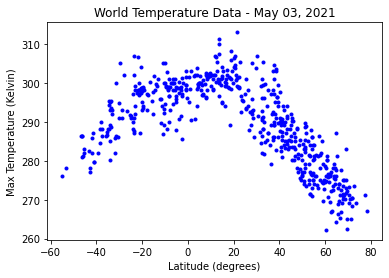

<Figure size 432x288 with 0 Axes>

In [28]:
from datetime import date

today = date.today()
d2 = today.strftime("%B %d, %Y")

plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.show()
plt.savefig('World_Temperature.png')

## Latitude vs. Humidity Plot

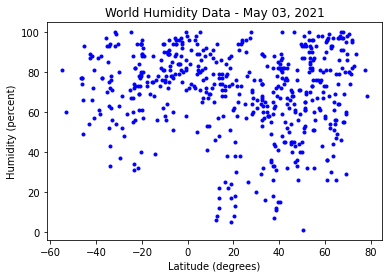

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Humidity'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (percent)')
plt.title('World Humidity Data - %s' % d2)
plt.show()
plt.savefig('World_Humidity.png')

## Latitude vs. Cloudiness Plot

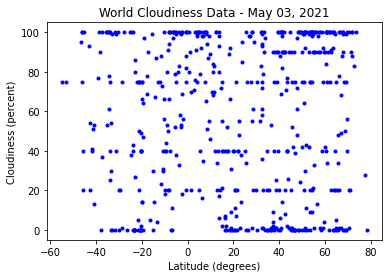

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Cloudiness'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (percent)')
plt.title('World Cloudiness Data - %s' % d2)
plt.show()
plt.savefig('World_Cloudiness.png')

## Latitude vs. Wind Speed Plot

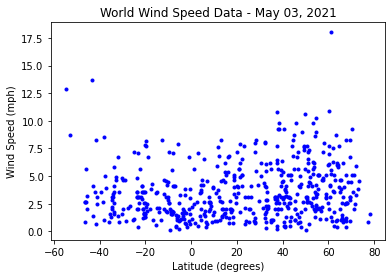

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Wind Speed'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('World Wind Speed Data - %s' % d2)
plt.show()
plt.savefig('World_WindSpeed.png')

## Linear Regression

In [14]:
def linear_plot(x,y,xstring,ystring,thistitle):
    res = linregress(x, y)
    
    from datetime import date

    today = date.today()
    d2 = today.strftime("%B %d, %Y")

    plt.plot(x,y,'b.',label='Data')
    plt.plot(x, res.intercept + res.slope*x, 'r-', label='Linear Fit')
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.title(thistitle % d2)
    plt.legend()
    plt.show()

    from scipy.stats import t
    tinv = lambda p, dof: abs(t.ppf(p/2, dof))
    ts = tinv(0.05, len(x)-2)
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

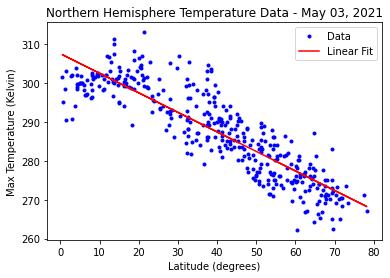

R-squared: 0.773977
slope (95%): -0.503389 +/- 0.027622


In [15]:
clean_city_north = clean_city_data[clean_city_data['Latitude']>0.0]

linear_plot(clean_city_north['Latitude'],clean_city_north['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Northern Hemisphere Temperature Data - %s')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

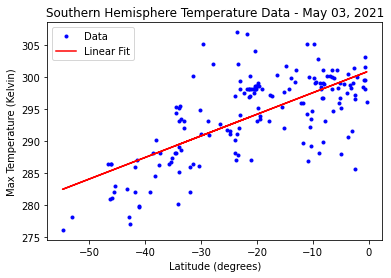

R-squared: 0.466319
slope (95%): 0.337117 +/- 0.055265


In [16]:
clean_city_south = clean_city_data[clean_city_data['Latitude']<0.0]

linear_plot(clean_city_south['Latitude'],clean_city_south['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Southern Hemisphere Temperature Data - %s')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

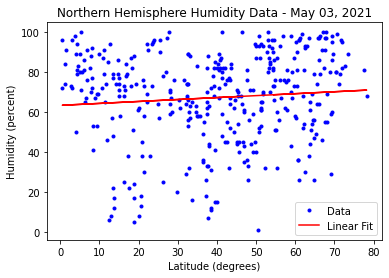

R-squared: 0.007570
slope (95%): 0.097482 +/- 0.113334


In [17]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Humidity'],'Latitude (degrees)','Humidity (percent)','Northern Hemisphere Humidity Data - %s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

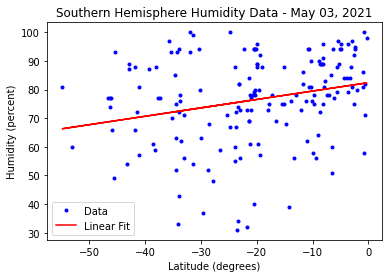

R-squared: 0.063940
slope (95%): 0.293770 +/- 0.172245


In [18]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Humidity'],'Latitude (degrees)','Humidity (percent)','Southern Hemisphere Humidity Data - %s')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

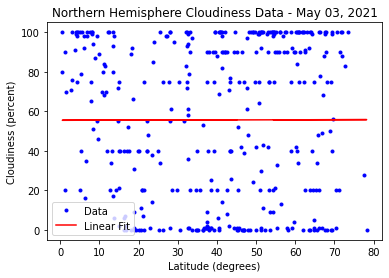

R-squared: 0.000005
slope (95%): 0.004235 +/- 0.197965


In [19]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Northern Hemisphere Cloudiness Data - %s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

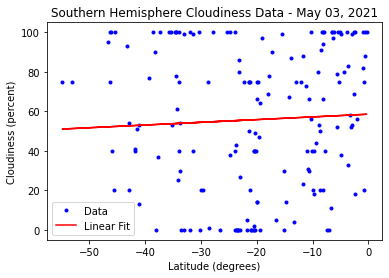

R-squared: 0.002620
slope (95%): 0.137013 +/- 0.409640


In [20]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Southern Hemisphere Cloudiness Data - %s')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

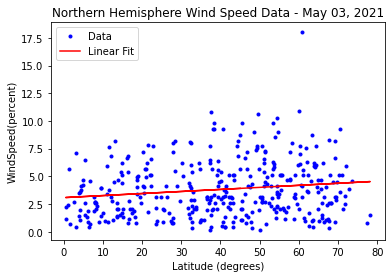

R-squared: 0.022134
slope (95%): 0.018512 +/- 0.012494


In [21]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Northern Hemisphere Wind Speed Data - %s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

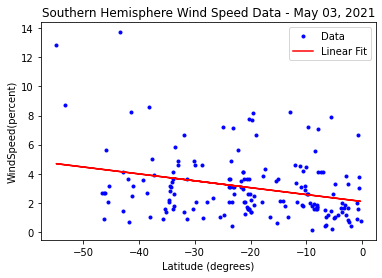

R-squared: 0.081397
slope (95%): -0.047501 +/- 0.024453


In [22]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Southern Hemisphere Wind Speed Data - %s')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression